<a href="https://colab.research.google.com/github/amitpaul05/Journey-to-AI/blob/master/skin_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download nodoubttome/skin-cancer9-classesisic

Dataset URL: https://www.kaggle.com/datasets/nodoubttome/skin-cancer9-classesisic
License(s): other
100% 783M/786M [00:42<00:00, 19.0MB/s]
100% 786M/786M [00:42<00:00, 19.3MB/s]


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('/content/skin-cancer9-classesisic.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, BatchNormalization, Dropout, Rescaling
from keras.optimizers import SGD

In [ ]:
# generators

train_data = keras.utils.image_dataset_from_directory(
    directory='/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train',
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="training",
    seed=123
)

# Loading the validation data
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train',
    seed=123,
    validation_split=0.2,
    image_size=(256, 256),
    batch_size=32,
    color_mode='rgb',
    subset='validation'
)


test_data = keras.utils.image_dataset_from_directory(
    directory='/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test',
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.
Found 118 files belonging to 9 classes.


In [ ]:
# # Normalize

# def process(image, label):
#   image = tf.cast(image/255. , tf.float32)
#   return image, label

# train_data = train_data.map(process)
# val_data = val_ds.map(process)
# test_data = test_data.map(process)

In [ ]:
# List out all the classes of skin cancer and store them in a list.
class_names = train_data.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


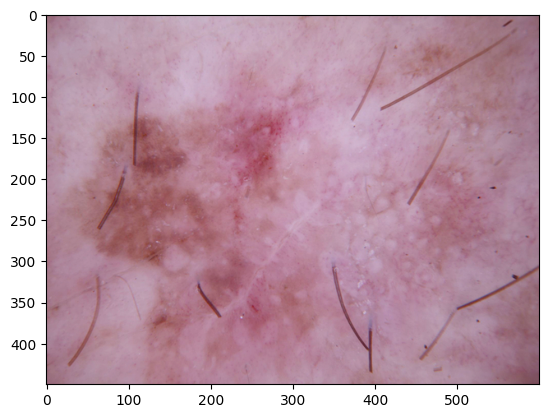

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pathlib


# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test")


image = plt.imread((list(data_dir_train.glob(class_names[0]+'/*.jpg'))[1]))
plt.imshow(image)

In [ ]:
for t in train_data:
  print(t)
  break

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[ 50.445312,  34.38214 ,  52.442627],
         [ 59.578125,  36.67981 ,  57.954895],
         [ 67.068054,  46.544067,  66.388916],
         ...,
         [102.45703 ,  68.45703 ,  93.078125],
         [ 94.43005 ,  65.76373 ,  88.16797 ],
         [ 87.93616 ,  59.936157,  82.81183 ]],

        [[ 55.      ,  33.2912  ,  53.551147],
         [ 64.05115 ,  40.43927 ,  63.73297 ],
         [ 72.71875 ,  47.835327,  70.78638 ],
         ...,
         [103.84784 ,  71.672485,  94.11963 ],
         [ 98.3338  ,  66.3338  ,  89.44141 ],
         [ 90.7616  ,  62.716736,  84.80859 ]],

        [[ 56.789062,  36.806335,  56.709778],
         [ 64.9447  ,  43.882202,  62.92743 ],
         [ 73.43158 ,  49.04254 ,  70.6535  ],
         ...,
         [104.19183 ,  75.44849 ,  97.99188 ],
         [101.76605 ,  68.91345 ,  95.55347 ],
         [ 93.14514 ,  62.706482,  85.97937 ]],

        ...,

        [[ 48.245544,  31.424683

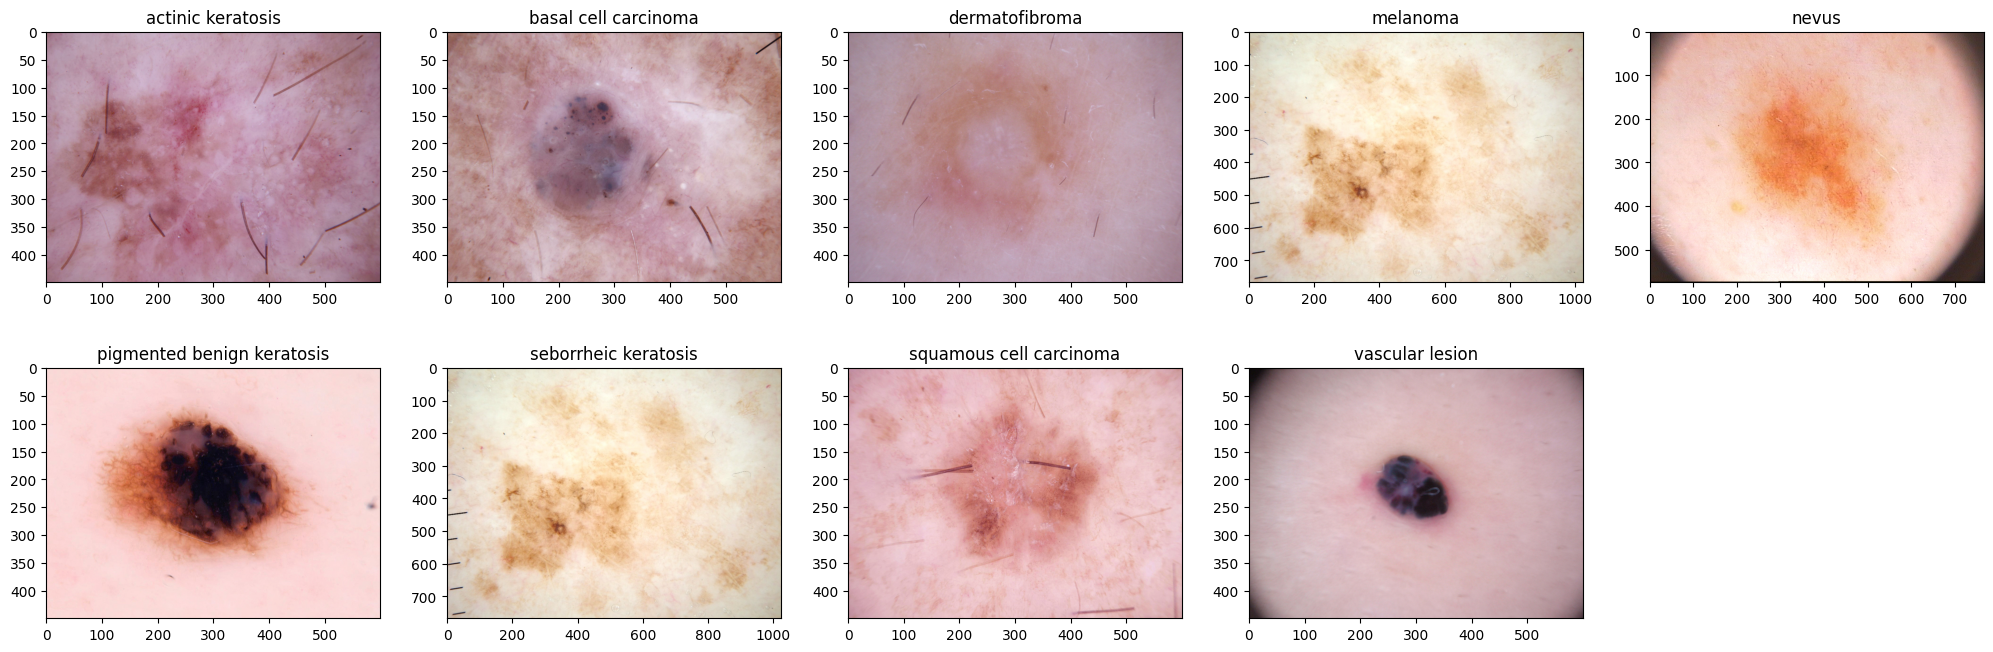

In [ ]:
# classwise example image


plt.figure(figsize=(25,8))
for i in range(len(class_names)):
  plt.subplot(2,5,i+1)
  image= plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [ ]:
# Configure the dataset for performance

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)
val_data = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# CNN model

model = Sequential()
model.add(Rescaling(scale=1./255,input_shape=(256,256,3)))

model.add(Conv2D(10, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(20, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(40, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(80, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Flatten())

model.add(Dense(80, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(9, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# opt = SGD(learning_rate=0.001, momentum=0.9)
# model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 10)        │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 20)        │           1,820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 20)        │              80 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 40)          │           7,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 40)          │             160 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 40)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 80)          │          28,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 80)          │             320 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 80)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 15680)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 80)                  │       1,254,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 40)                  │           3,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,297,549 (4.95 MB)

 Trainable params: 1,297,249 (4.95 MB)

 Non-trainable params: 300 (1.17 KB)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Compiling the model
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=15, validation_data=val_data)

Epoch 1/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 220ms/step - accuracy: 0.2296 - loss: 2.7320 - val_accuracy: 0.1499 - val_loss: 3.6870
Epoch 2/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.3565 - loss: 1.8493 - val_accuracy: 0.1499 - val_loss: 4.3623
Epoch 3/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3549 - loss: 1.8483 - val_accuracy: 0.1499 - val_loss: 4.1470
Epoch 4/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4291 - loss: 1.6127 - val_accuracy: 0.1588 - val_loss: 3.4012
Epoch 5/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4561 - loss: 1.5575 - val_accuracy: 0.1611 - val_loss: 4.3013
Epoch 6/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4623 - loss: 1.5818 - val_accuracy: 0.2953 - val_loss: 1.8663
Epoch 7/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4876 - loss: 1.4011 - val_accuracy: 0.2058 - val_loss: 2.7958
Epoch 8/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5312 - loss: 1.3032 - val_accuracy: 0.4251 

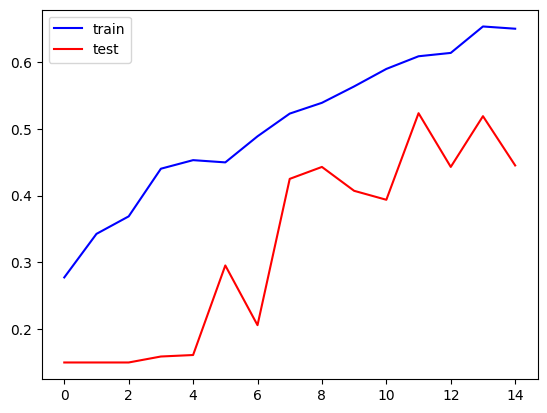

In [ ]:
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='test')

plt.legend()
plt.show()

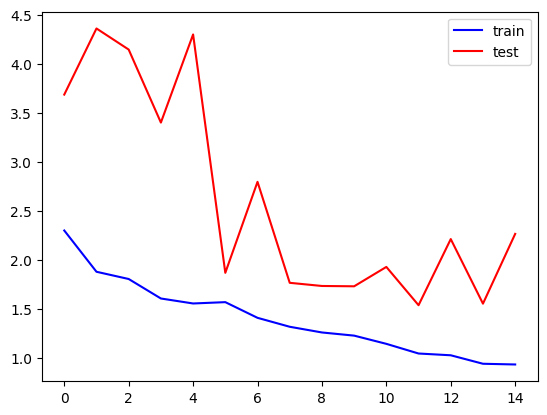

In [ ]:
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='test')

plt.legend()
plt.show()

In [ ]:
model.predict(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 854ms/step


array([[1.5963592e-01, 1.2537543e-01, 1.4311312e-01, ..., 3.9841705e-03,
        2.6842815e-01, 1.7017093e-02],
       [1.3336171e-01, 1.9752753e-01, 1.4503855e-01, ..., 6.3104397e-03,
        2.1557070e-01, 4.6174049e-02],
       [1.2944858e-14, 3.0333178e-14, 6.5737728e-12, ..., 2.2351406e-04,
        3.6731795e-10, 6.8373612e-20],
       ...,
       [6.6890941e-08, 2.1860265e-08, 1.0506992e-06, ..., 2.2620966e-03,
        6.0400282e-08, 4.2886367e-12],
       [4.0873248e-02, 6.1127383e-01, 7.6121435e-02, ..., 1.6710747e-02,
        7.7516742e-02, 5.4656342e-03],
       [1.6714443e-13, 1.6697354e-14, 6.8907385e-10, ..., 5.7474583e-05,
        2.4494247e-11, 4.6399013e-18]], dtype=float32)

In [ ]:
import numpy as np

# Get predicted class indices
predicted_classes = np.argmax(model.predict(train_data), axis=1)

print("Predicted Classes:", predicted_classes)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Predicted Classes: [3 3 4 ... 4 4 4]


In [ ]:
# Get predicted class indices for the test data
predicted_classes = np.argmax(model.predict(test_data), axis=1)

# Get the class names corresponding to the predicted indices
predicted_class_names = [class_names[i] for i in predicted_classes]

# Print the predicted class names for the test data
print("Predicted Classes for Test Data:", predicted_class_names)

# Alternatively, you can iterate through the test data and get the predictions for each batch
# for images, labels in test_data:
#     predictions = model.predict(images)
#     predicted_labels = np.argmax(predictions, axis=1)
#     print("True labels:", labels.numpy())
#     print("Predicted labels:", predicted_labels)
#     break  # Print only the first batch

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Predicted Classes for Test Data: ['squamous cell carcinoma', 'squamous cell carcinoma', 'nevus', 'basal cell carcinoma', 'melanoma', 'nevus', 'melanoma', 'squamous cell carcinoma', 'pigmented benign keratosis', 'squamous cell carcinoma', 'nevus', 'squamous cell carcinoma', 'basal cell carcinoma', 'nevus', 'nevus', 'melanoma', 'nevus', 'melanoma', 'basal cell carcinoma', 'pigmented benign keratosis', 'nevus', 'basal cell carcinoma', 'basal cell carcinoma', 'basal cell carcinoma', 'melanoma', 'melanoma', 'melanoma', 'squamous cell carcinoma', 'nevus', 'nevus', 'squamous cell carcinoma', 'nevus', 'squamous cell carcinoma', 'nevus', 'basal cell carcinoma', 'melanoma', 'melanoma', 'nevus', 'melanoma', 'nevus', 'squamous cell carcinoma', 'melanoma', 'basal cell carcinoma', 'pigmented benign keratosis', 'melanoma', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'melanoma', 'nevus', 'basal cell carcinoma', 'nevus', 'basal cell carcinoma', 'nevus', 'nevus', '

In [ ]:
# prompt: can i know fro which directory is the image and which class my model is predicting

import zipfile
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, BatchNormalization, Dropout, Rescaling
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import numpy as np
import os
import pathlib

# Load the test data using image_dataset_from_directory
IMG_WIDTH = 256
IMG_HEIGHT = 256
image_size = (IMG_WIDTH, IMG_HEIGHT)
BATCH_SIZE = 32
test_dir = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test'  # Replace with your test data directory
original_test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=image_size,
    interpolation='nearest',
    batch_size=BATCH_SIZE,
    shuffle=False  # Important: Set shuffle to False for consistent file paths
)
test_data = original_test_data.prefetch(buffer_size=tf.data.AUTOTUNE)

# Get predicted class indices for the test data
predicted_classes = np.argmax(model.predict(test_data), axis=1)

# Iterate through the test data and get the predictions for each batch, along with filepaths
for images, labels in test_data:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Get filepaths from the dataset
    filepaths = test_data.file_paths  # Assuming you're using tf.keras.preprocessing.image_dataset_from_directory

    # Print the predictions along with the corresponding filepaths and true labels
    for i in range(len(predicted_labels)):
        print(f"Filepath: {filepaths[i]}, True label: {labels[i].numpy()}, Predicted label: {predicted_labels[i]}, Predicted class: {class_names[predicted_labels[i]]}")

    break  # Print only the first batch

Found 118 files belonging to 9 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step


AttributeError: '_PrefetchDataset' object has no attribute 'file_paths'